# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import openweathermapy as ow
from pprint import pprint 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
cities_df=pd.DataFrame(cities)
cities_df.columns=["City"]
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat']=""
cities_df['Lng']=""
cities_df['Max Temp']=""
cities_df['Wind Speed']=""
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,constitucion,,,,,,,,
1,anqing,,,,,,,,
2,ust-koksa,,,,,,,,
3,buariki,,,,,,,,
4,nikolskoye,,,,,,,,


In [43]:
settings = {"units": "metric", "appid": api_key}

for index, row in cities_df.iterrows():
    
    try: 
        weather_data = ow.get_current(row['City'], **settings)
        
        print(f"Processing Record {(index+1)%50} of Set {(index+1)//50+1} | {cities[index]}")
        
        cities_df.loc[index,'Cloudiness'] = weather_data['clouds']['all']
        cities_df.loc[index, 'Country'] = weather_data['sys']['country']
        cities_df.loc[index, 'Date'] = weather_data['dt']
        cities_df.loc[index, 'Humidity'] = weather_data['main']['humidity']
        cities_df.loc[index, 'Lat'] = weather_data['coord']['lat']
        cities_df.loc[index, 'Lng'] = weather_data['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = weather_data['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = weather_data['wind']['speed']
        
    except:
        print("Missing field/result... skipping.")

        


Processing Record 1 of Set 1 | constitucion
Processing Record 2 of Set 1 | anqing
Processing Record 3 of Set 1 | ust-koksa
Missing field/result... skipping.
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | esmeraldas
Processing Record 7 of Set 1 | atasu
Processing Record 8 of Set 1 | bollnas
Processing Record 9 of Set 1 | lebu
Missing field/result... skipping.
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | boa vista
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | howard springs
Processing Record 15 of Set 1 | malaya purga
Processing Record 16 of Set 1 | komsomolskiy
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | bondo
Missing field/result... skipping.
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | talnakh
Processing Record 23 of Set 1 | salamiyah
Processing Record 24 of Set 1 | ancud
Processing Record 25 of Set 1 | dikson
Proces

Processing Record 3 of Set 5 | havelock
Processing Record 4 of Set 5 | yarada
Processing Record 5 of Set 5 | kahului
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | tyukhtet
Processing Record 9 of Set 5 | zambrow
Processing Record 10 of Set 5 | norman wells
Processing Record 11 of Set 5 | sulangan
Processing Record 12 of Set 5 | ayame
Processing Record 13 of Set 5 | pacific grove
Processing Record 14 of Set 5 | yulara
Processing Record 15 of Set 5 | bahir dar
Processing Record 16 of Set 5 | lakes entrance
Processing Record 17 of Set 5 | roma
Processing Record 18 of Set 5 | katsuura
Processing Record 19 of Set 5 | high rock
Processing Record 20 of Set 5 | ponta do sol
Missing field/result... skipping.
Processing Record 22 of Set 5 | tucumcari
Processing Record 23 of Set 5 | cherskiy
Processing Record 24 of Set 5 | uglegorsk
Processing Record 25 of Set 5 | mar del plata
Processing Record 26 of Set 5 | iqaluit
Missing field/

Processing Record 8 of Set 9 | challans
Processing Record 9 of Set 9 | yinchuan
Processing Record 10 of Set 9 | orlik
Processing Record 11 of Set 9 | toba
Processing Record 12 of Set 9 | bull savanna
Missing field/result... skipping.
Processing Record 14 of Set 9 | aswan
Processing Record 15 of Set 9 | beringovskiy
Processing Record 16 of Set 9 | at-bashi
Processing Record 17 of Set 9 | nerchinsk
Processing Record 18 of Set 9 | kamaishi
Processing Record 19 of Set 9 | biloela
Processing Record 20 of Set 9 | sitka
Processing Record 21 of Set 9 | broken hill
Processing Record 22 of Set 9 | aklavik
Processing Record 23 of Set 9 | whitehorse
Processing Record 24 of Set 9 | itarema
Missing field/result... skipping.
Processing Record 26 of Set 9 | san quintin
Processing Record 27 of Set 9 | ponta delgada
Processing Record 28 of Set 9 | grand bend
Processing Record 29 of Set 9 | gikongoro
Processing Record 30 of Set 9 | codrington
Processing Record 31 of Set 9 | awjilah
Processing Record 32 o

In [44]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,constitucion,90,MX,1537396920,68,23.99,-104.67,20,0.57
1,anqing,44,CN,1537401708,94,30.51,117.04,26.89,1.17
2,ust-koksa,0,RU,1537401709,74,50.27,85.62,-8.92,0.82
3,buariki,,,,,,,,
4,nikolskoye,20,RU,1537399800,87,59.7,30.79,15,3


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5,1,'Latitude vs. Max Temperatue Celcius (09/19/2018)')

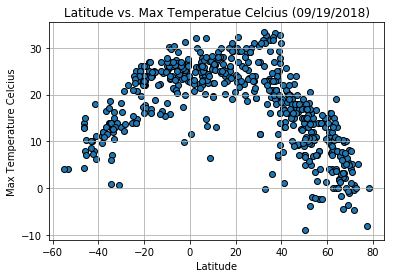

In [79]:
Latplot=pd.to_numeric(cities_df.Lat)
Templot=pd.to_numeric(cities_df['Max Temp'])
plt.scatter(Latplot,Templot,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature Celcius")
plt.title("Latitude vs. Max Temperatue Celcius (09/19/2018)")

#### Latitude vs. Humidity Plot

Text(0.5,1,'Latitude vs. Humudity (09/19/2018)')

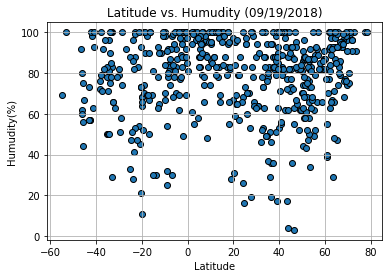

In [81]:
Latplot=pd.to_numeric(cities_df.Lat)
Humplot=pd.to_numeric(cities_df['Humidity'])
plt.scatter(Latplot,Humplot,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humudity(%)")
plt.title("Latitude vs. Humudity (09/19/2018)")

#### Latitude vs. Cloudiness Plot

Text(0.5,1,'Latitude vs. Cloudiness (09/19/2018)')

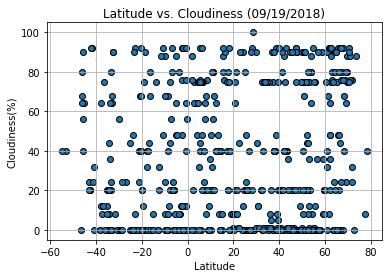

In [83]:
Latplot=pd.to_numeric(cities_df.Lat)
Cloplot=pd.to_numeric(cities_df['Cloudiness'])
plt.scatter(Latplot,Cloplot,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Latitude vs. Cloudiness (09/19/2018)")

#### Latitude vs. Wind Speed Plot

Text(0.5,1,'Latitude vs. Humudity (09/19/2018)')

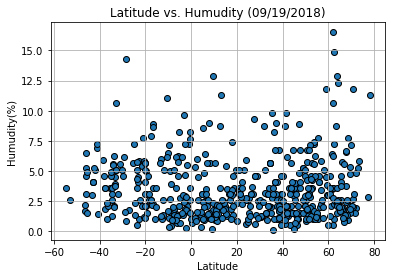

In [84]:
Latplot=pd.to_numeric(cities_df.Lat)
Winplot=pd.to_numeric(cities_df['Wind Speed'])
plt.scatter(Latplot,Winplot,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humudity(%)")
plt.title("Latitude vs. Humudity (09/19/2018)")